# Stage 2 Task - Exploratory Data Analysis 📈📊


## Task Objective
---
Perform exploratory data analysis (EDA) on a marketing dataset to uncover key insights that can guide strategic decision-making. Present findings through a well-structured presentation, including relevant visualizations, insights, and code snippets.

## Insight Generation Analyze the dataset to extract meaningful insights, such as:
---
1. [Insight into the REVENUE of Company](#REVENUE)
2. [Comparing campaign performance across different channels.](#campaign_performance)
3. [Calculating CTR, CPC, and conversion rates to assess campaign effectiveness.](#conversion_rates)
4.[Identifying high-performing and under-performing campaigns based on ROI.](#high_performing)
5. [Exploring location-based trends to uncover demographic or cultural influences on campaign success.](#location_based)<br>
 ### [Other Market Insight](#Other_Insight)📑
- Preferred Campaign Type for Each Company
- Preferred Marketing Channel for Each Company
- Most Profitable location for Each Company
- Most Profitable Customer Segment for each Company
- Most Profitable Target Audience for each Company
- Market Trend
- Overall Most Profitable Campaign type
- Overall Campaign type & Marketing Channel with the most Click-Through Rate
- Target Audience with the most Click-Through Rate and Return On Investment 

In [443]:
# Import the necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

# Set plot style
sns.set(style="whitegrid")

In [444]:
#Load the dataset
market_cmp = pd.read_excel("C:/Users/Mishael/Documents/HNG INTERNSHIP PROGRAM/marketing_campaign_dataset.xlsx")

In [445]:
market_cmp.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [446]:
market_cmp.shape

(200005, 15)

In [447]:
market_cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


In [448]:
market_cmp.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

The date column is not formatted to the correct datatype ``datetime``. Due to some inconsistent formatting, some date values could not be converted and these unconvertible values are replaced with NaT (Not a Time), which is counted as missing (NaN).<br>
TO RECTIFY THIS INCONSISTENCY, WE NEED TO APPROACH IT THIS WAY:

In [449]:
# Convert the datatype to string
market_cmp["Date"] = market_cmp["Date"].astype(str)
print(market_cmp["Date"].str.len().unique())  # Check the unique lengths again


[19 10]


In [450]:
# After which you convert to datetime
market_cmp["Date"] = pd.to_datetime(market_cmp["Date"], errors="coerce")

In [451]:
print("Missing Dates After Conversion:", market_cmp["Date"].isna().sum())
print(market_cmp[market_cmp["Date"].isna()].head(10))  # View rows with missing dates

Missing Dates After Conversion: 0
Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Customer_Segment]
Index: []


<a id="REVENUE"> <h2> 1. Insight into the REVENUE of the Companies </h2> </a>

In [452]:
# Calculate Revenue using the available ROI and Acquisition Cost (Spend)
market_cmp["Revenue"] = (market_cmp["ROI"] * market_cmp["Acquisition_Cost"]) + market_cmp["Acquisition_Cost"]

# Display basic stats to verify calculations
print("Revenue Statistics:\n", market_cmp["Revenue"].describe())

Revenue Statistics:
 count    200005.000000
mean      75091.284582
std       34798.987344
min       15071.070000
25%       47728.220000
50%       68815.620000
75%       98146.300000
max      179438.360000
Name: Revenue, dtype: float64


In [453]:
# Check sample revenue values
market_cmp[["Company", "ROI", "Acquisition_Cost", "Revenue"]].head(10)

,Company,ROI,Acquisition_Cost,Revenue
0,Innovate Industries,6.29,16174,117908.46
1,NexGen Systems,5.61,11566,76451.26
2,Alpha Innovations,7.18,10200,83436.00
3,DataTech Solutions,5.55,12724,83342.20
4,NexGen Systems,6.50,16452,123390.00
5,DataTech Solutions,4.36,9716,52077.76
6,NexGen Systems,2.86,11067,42718.62
7,DataTech Solutions,5.55,13280,86984.00
8,Alpha Innovations,6.73,18066,139650.18
9,TechCorp,3.78,13766,65801.48


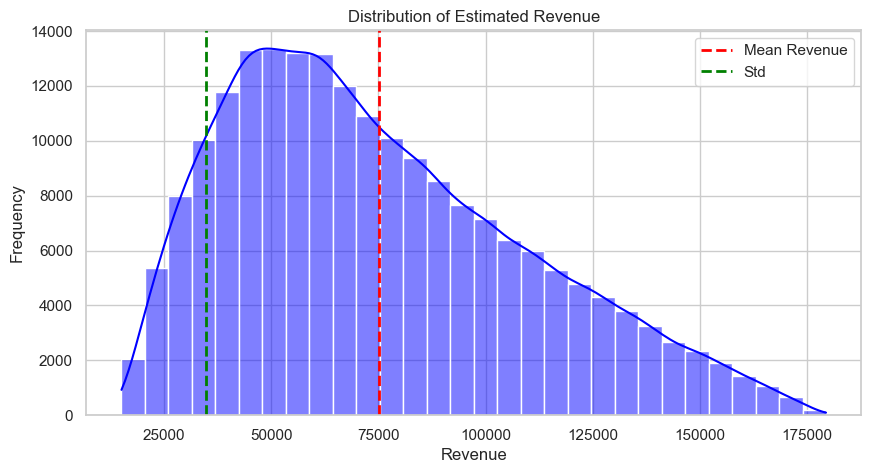

In [454]:
plt.figure(figsize=(10, 5))
sns.histplot(market_cmp["Revenue"], bins=30, kde=True, color="blue")
plt.axvline(market_cmp["Revenue"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Revenue")
plt.axvline(market_cmp["Revenue"].std(), color='green', linestyle='dashed', linewidth=2, label="Std")
plt.title("Distribution of Estimated Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### 1.1. Revenue and Profit Over Time

In [455]:
# Calculate Profit using ROI and Acquisition_Cost
market_cmp["Profit"] = market_cmp["ROI"] * market_cmp["Acquisition_Cost"]

# Display first few rows
market_cmp[["Company", "Campaign_Type", "ROI", "Acquisition_Cost", "Profit", "Revenue"]].head()


,Company,Campaign_Type,ROI,Acquisition_Cost,Profit,Revenue
0,Innovate Industries,Email,6.29,16174,101734.46,117908.46
1,NexGen Systems,Email,5.61,11566,64885.26,76451.26
2,Alpha Innovations,Influencer,7.18,10200,73236.00,83436.00
3,DataTech Solutions,Display,5.55,12724,70618.20,83342.20
4,NexGen Systems,Email,6.50,16452,106938.00,123390.00


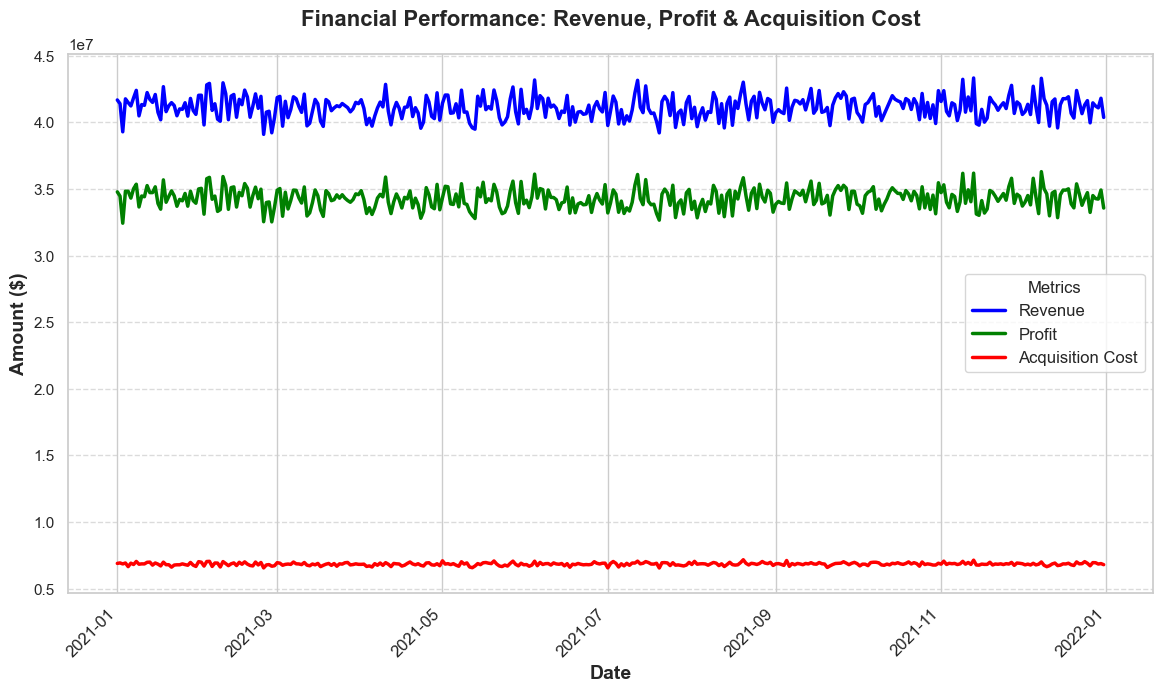

In [456]:
# Group data by Date and sum relevant columns
time_series_data = market_cmp.groupby("Date")[["Revenue", "Profit", "Acquisition_Cost"]].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=time_series_data, x="Date", y="Revenue", label="Revenue", color="blue", linewidth=2.5)
sns.lineplot(data=time_series_data, x="Date", y="Profit", label="Profit", color="green", linewidth=2.5)
sns.lineplot(data=time_series_data, x="Date", y="Acquisition_Cost", label="Acquisition Cost", color="red", linewidth=2.5)

# Formatting
plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=14, fontweight="bold")
plt.title("Financial Performance: Revenue, Profit & Acquisition Cost", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Metrics", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### 1.2. Company Revenue and Profit

In [457]:
# Companies Revenue and Profit
top_market = market_cmp.groupby("Company")[["Revenue", "Profit", "Acquisition_Cost"]].sum().sort_values(ascending = False, by= "Profit").reset_index().head()
top_market

,Company,Revenue,Profit,Acquisition_Cost
0,TechCorp,3.024611e+09,2.521257e+09,503353613
1,Alpha Innovations,3.011679e+09,2.510497e+09,501182021
2,DataTech Solutions,3.004858e+09,2.504555e+09,500302629
3,NexGen Systems,2.995155e+09,2.495458e+09,499696506
4,Innovate Industries,2.982330e+09,2.485914e+09,496416112


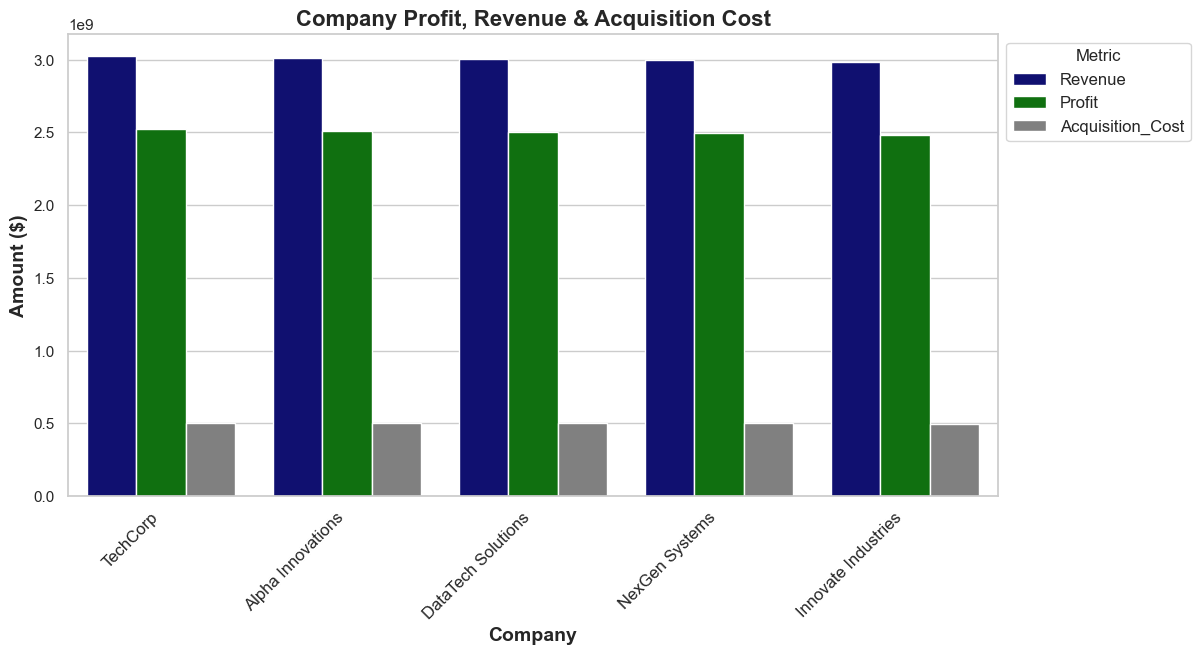

In [458]:
# Melt the dataframe to have 'Company', 'Metric' (Revenue/Profit), and 'Value'
top_market_melted = top_market.melt(id_vars="Company", value_vars=["Revenue", "Profit", "Acquisition_Cost"], var_name="Metric", value_name="Amount")



# Plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_market_melted, x="Company", y="Amount", hue="Metric", palette=["Navy", "green", "grey"])

# Formatting
plt.xlabel("Company", fontsize=14, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=14, fontweight="bold")
plt.title("Company Profit, Revenue & Acquisition Cost", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Metric", fontsize=12, bbox_to_anchor=(1, 1))

# Show plot
plt.show()


<a id="campaign_performance"><h2>  2. Comparing campaign performance across different channels. </h2></a>

In [459]:
# Group by marketing channel and compute key metrics
channel_performance = market_cmp.groupby("Channel_Used").agg({
    "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  
    "ROI": "mean" 
}).reset_index()

# Calculate CTR, CPC, and ROI
channel_performance["CTR"] = (channel_performance["Clicks"] / channel_performance["Impressions"]) * 100
channel_performance["CPC"] = channel_performance["Acquisition_Cost"] / channel_performance["Clicks"]

# Display results
channel_performance.head()

,Channel_Used,Clicks,Impressions,Acquisition_Cost,Conversion_Rate,ROI,CTR,CPC
0,Email,18493963,184801107,420874104,0.080282,4.996487,10.007496,22.757378
1,Facebook,18038175,180662496,410603426,0.079990,5.018672,9.984460,22.763025
2,Google Ads,18342589,185020154,418944514,0.080181,5.003126,9.913833,22.839988
3,Instagram,18316654,183738455,417124850,0.079886,4.988706,9.968873,22.772983
4,Website,18415351,183815901,416606897,0.080182,5.014114,10.018367,22.622805


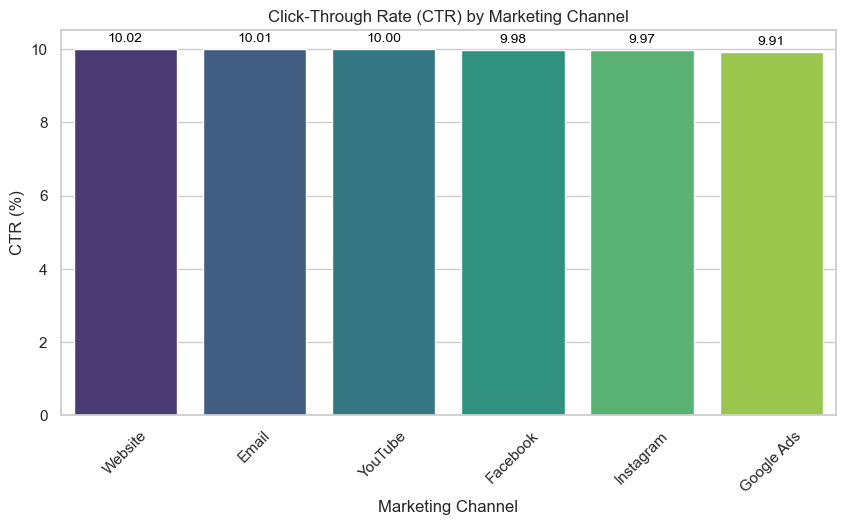

In [460]:
# Plot CTR across channels
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Channel_Used", y="CTR", data=channel_performance.sort_values(ascending=False, by="CTR"), palette="viridis")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=10, color="black")
    
plt.title("Click-Through Rate (CTR) by Marketing Channel")
plt.ylabel("CTR (%)")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45)
plt.show()


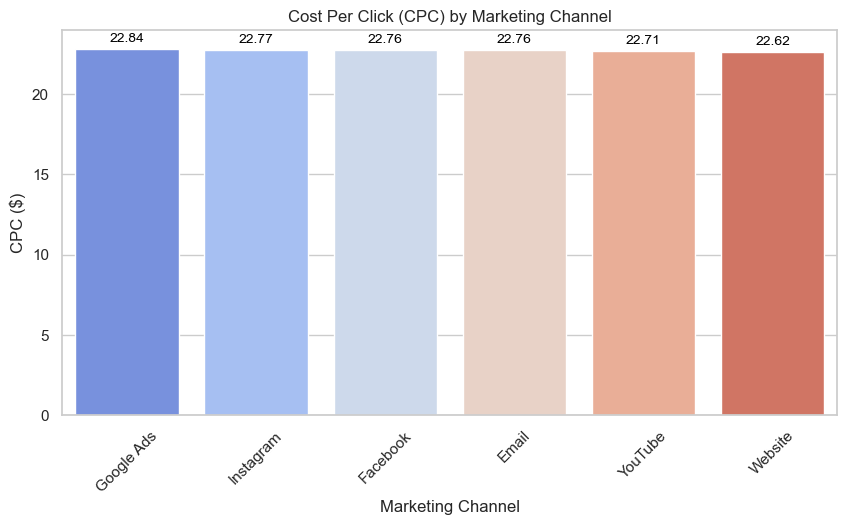

In [461]:
# Plot CPC across channels
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Channel_Used", y="CPC", data=channel_performance.sort_values(ascending=False, by="CPC"), palette="coolwarm")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=10, color="black")

plt.title("Cost Per Click (CPC) by Marketing Channel")
plt.ylabel("CPC ($)")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45)
plt.show()


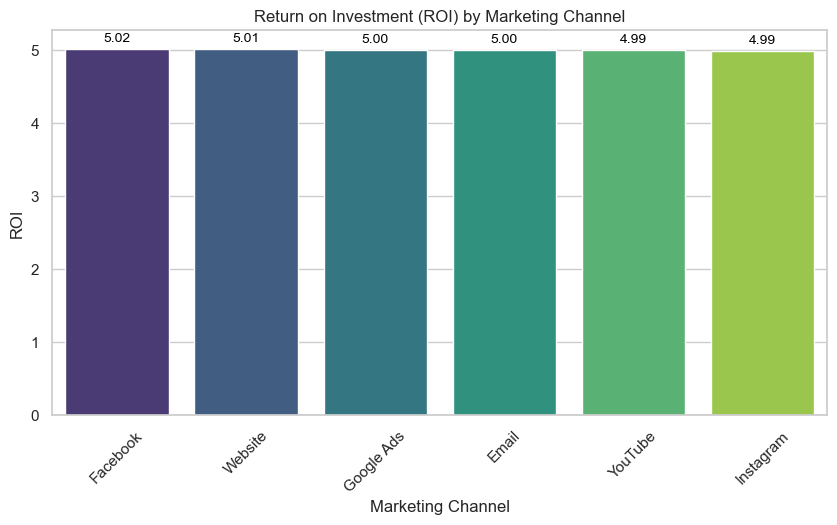

In [462]:
# Plot ROI across channels
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Channel_Used", y="ROI", data=channel_performance.sort_values(ascending=False, by="ROI"), palette="viridis")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=10, color="black")

plt.title("Return on Investment (ROI) by Marketing Channel")
plt.ylabel("ROI")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45)
plt.show()

<a id="(conversion_rates)"><h2> 3. Calculating CTR, CPC, and conversion rates to assess campaign effectiveness.</h2></a>

In [463]:
# Calculate CTR and CPC for each campaign
market_cmp["CTR"] = (market_cmp["Clicks"] / market_cmp["Impressions"]) * 100
market_cmp["CPC"] = market_cmp["Acquisition_Cost"] / market_cmp["Clicks"]

# Summary statistics
market_cmp[["CTR", "CPC"]].describe()

,CTR,CPC
count,200005.000000,200005.000000
mean,14.040504,32.008319
std,13.087980,26.925841
min,1.005429,5.021084
25%,5.860637,15.092037
50%,9.978960,22.773973
75%,16.969848,38.598253
max,99.202393,199.960000


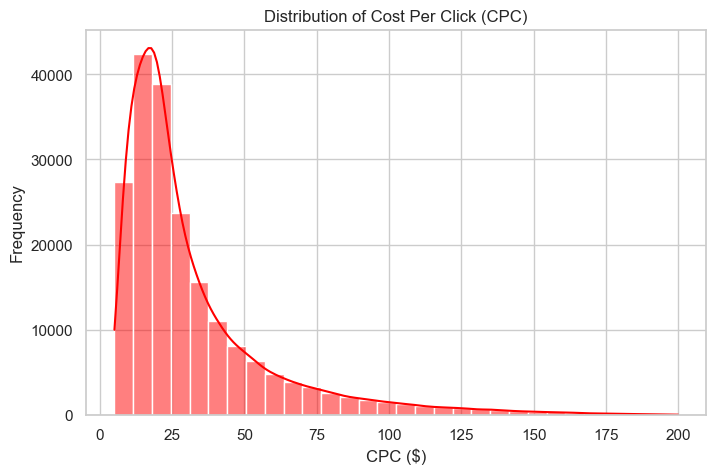

In [464]:
# CPC Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(market_cmp["CPC"], bins=30, kde=True, color="red")
plt.title("Distribution of Cost Per Click (CPC)")
plt.xlabel("CPC ($)")
plt.ylabel("Frequency")
plt.show()


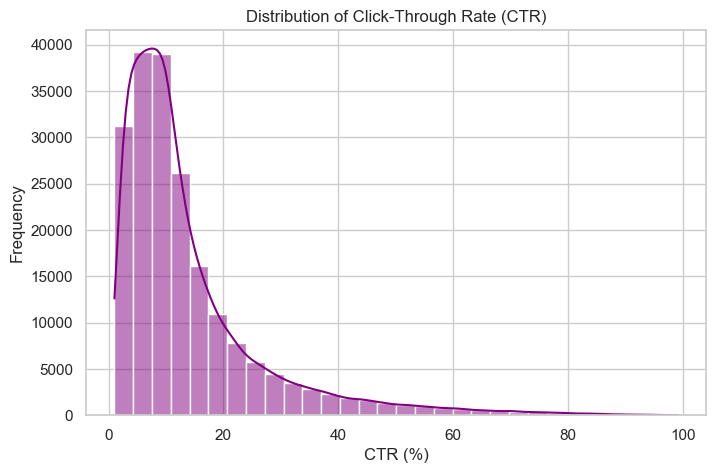

In [465]:
# CTR Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(market_cmp["CTR"], bins=30, kde=True, color="purple")
plt.title("Distribution of Click-Through Rate (CTR)")
plt.xlabel("CTR (%)")
plt.ylabel("Frequency")
plt.show()


In [466]:
# Group by marketing Campaign_Type and compute key metric
Campaign_Type_performance = market_cmp.groupby("Campaign_Type").agg({
    "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean",
    "CTR": "mean",
    "CPC": "sum"# Using mean ROI per campaign
}).reset_index()

# Display results
Campaign_Type_performance.head()

,Campaign_Type,Clicks,Impressions,Acquisition_Cost,Conversion_Rate,ROI,CTR,CPC
0,Display,22031837,220080744,500177139,0.080088,5.006497,14.126483,1.276553e+06
1,Email,21898130,220147995,498197617,0.079787,4.994274,13.948757,1.277456e+06
2,Influencer,22038185,220771844,502419033,0.080315,5.011040,14.030083,1.289563e+06
3,Search,22032144,221415139,501911760,0.080021,5.008357,13.993587,1.283452e+06
4,Social Media,21957371,219073236,498245332,0.080132,4.991781,14.103856,1.274799e+06


<a id="high_performing"><h2> 4. Identifying high-performing and underperforming campaigns based on ROI.</h2></a>

In [512]:
# Sort campaigns by ROI
top_campaigns = market_cmp.sort_values("ROI", ascending=False).head(20)
low_campaigns = market_cmp.sort_values("ROI", ascending=True).head(10)

print("Top 10 High-Performing Campaigns by ROI:")
top_campaigns[["Campaign_ID", "Company", "Campaign_Type", "Channel_Used", "ROI", "Revenue"]]\
.sort_values("Revenue", ascending=False).head(5)

Top 10 High-Performing Campaigns by ROI:


,Campaign_ID,Company,Campaign_Type,Channel_Used,ROI,Revenue
182656,182657,Alpha Innovations,Search,Facebook,8.0,173250.0
83445,83446,Alpha Innovations,Search,Email,8.0,170604.0
47112,47113,DataTech Solutions,Influencer,Google Ads,8.0,161721.0
98646,98647,TechCorp,Search,YouTube,8.0,143586.0
73036,73037,NexGen Systems,Email,YouTube,8.0,138186.0


There are quite a number of high-performing campaign with the peak ROI of 8.0, but the `Campaign ID-182657 (Alpha Innovations)` outpace the others with a `Revenue` of `173250`

In [468]:
print("\nTop 10 Low-Performing Campaigns by ROI:")
low_campaigns[["Campaign_ID", "Company", "Campaign_Type", "Channel_Used", "ROI", "Revenue"]].sort_values("Revenue", ascending=False).head()


Top 10 Low-Performing Campaigns by ROI:


,Campaign_ID,Company,Campaign_Type,Channel_Used,ROI,Revenue
175913,175914,DataTech Solutions,Social Media,YouTube,2.0,59136.0
40004,40005,TechCorp,Influencer,Facebook,2.0,58068.0
153591,153592,DataTech Solutions,Email,Instagram,2.0,57309.0
143928,143929,DataTech Solutions,Social Media,Facebook,2.0,56376.0
117384,117385,NexGen Systems,Email,Email,2.0,51252.0


<a id="location_based"><h2> 5. Exploring location-based trends to uncover demographic or cultural influences on campaign success.</h2></a>

In [469]:
# Group by location and calculate key metrics
location_performance = market_cmp.groupby("Location").agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean" 
}).sort_values(ascending=False, by="ROI").reset_index()

# Calculate CTR and ROI
location_performance["CTR"] = (location_performance["Clicks"] / location_performance["Impressions"]) * 100
location_performance["CPC"] = location_performance["Acquisition_Cost"] / location_performance["Clicks"]

# Display results
location_performance.head()


,Location,Clicks,Impressions,Acquisition_Cost,Conversion_Rate,ROI,CTR,CPC
0,Miami,22056765,221347726,503974911,0.080047,5.012282,9.964758,22.848995
1,Los Angeles,21966553,219652325,500637366,0.080013,5.010876,10.000601,22.790893
2,Houston,21893075,219129799,495080401,0.079949,5.007174,9.990916,22.613562
3,Chicago,21980408,219999352,500771983,0.080131,5.001555,9.991124,22.782652
4,New York,22060866,221359756,500486220,0.080203,4.980185,9.966069,22.686608


In [ ]:
Miami generate the most ROI `5.012282`, although Los Angeles has the most CTR `10.000601`. This could indicate that 

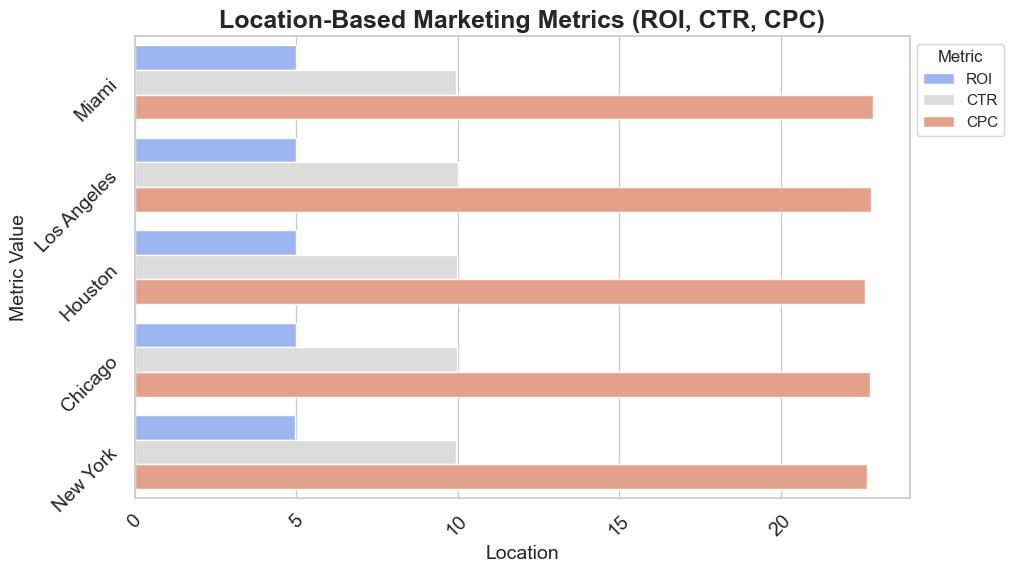

In [492]:
# Set figure size
plt.figure(figsize=(10, 6))

# Melt data for seaborn compatibility
location_performance_melted = location_performance[["Location", "ROI", "CTR", "CPC"]].melt(id_vars=["Location"], var_name="Metric", value_name="Value")

# Plot grouped bar chart
sns.barplot(x="Value", y="Location", hue="Metric", data=location_performance_melted, palette="coolwarm")

# Formatting
plt.title("Location-Based Marketing Metrics (ROI, CTR, CPC)", fontsize=18, fontweight="bold")
plt.xlabel("Location", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.legend(title="Metric", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.show()


<a id="Other_Insight"><h3>Other Market Insight:</h3></a>
---
### Preferred Campaign Type for Each Company
which Campaign type generate the most ROI?

In [471]:
# Group by Company and Campaign Type, and calculate key metrics
company_campaign_performance = market_cmp.groupby(["Company", "Campaign_Type"]).agg({
    "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean", 
    "ROI": "mean" }).reset_index()

# Drop NaN values that may have appeared
company_campaign_performance.fillna(0, inplace=True)

# Identify the preferred campaign type per company based on highest ROI
preferred_campaigns = company_campaign_performance.loc[
    company_campaign_performance.groupby("Company")["ROI"].idxmax(),
    ["Company", "Campaign_Type", "ROI", "Conversion_Rate"]]

# Display results
print("preferred campaign type:")
preferred_campaigns.head()



preferred campaign type:


,Company,Campaign_Type,ROI,Conversion_Rate
2,Alpha Innovations,Influencer,5.033126,0.080181
5,DataTech Solutions,Display,5.049224,0.080651
10,Innovate Industries,Display,5.018512,0.079666
18,NexGen Systems,Search,5.005118,0.080066
22,TechCorp,Influencer,5.023186,0.079881


The table above shows the best Campaign type appropriate for each comapany given the most ROI

### Preferred Marketing Channel for Each Company

In [472]:
# Group by Company and Channel_Used, and calculate key metrics
company_Channel_Used_performance = market_cmp.groupby(["Company", "Channel_Used"]).agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean" 
}).reset_index()

# Identify the preferred Channel_Used per company based on highest ROI
preferred_Channel_Used = company_Channel_Used_performance.loc[
    company_Channel_Used_performance.groupby("Company")["ROI"].idxmax(),
    ["Company", "Channel_Used", "ROI", "Conversion_Rate"]
]

# Display results
print("preferred Marketing Channel:")
preferred_Channel_Used.head()

preferred Marketing Channel:


,Company,Channel_Used,ROI,Conversion_Rate
5,Alpha Innovations,YouTube,5.036764,0.079800
10,DataTech Solutions,Website,5.040937,0.080472
12,Innovate Industries,Email,5.022140,0.080352
20,NexGen Systems,Google Ads,5.008727,0.079610
25,TechCorp,Facebook,5.031797,0.080012


similarly, above are the most profitable channel by which each company can obtain the most ROI

### Most Profitable location for Each Company

In [473]:
# Group by Company and Location, and calculate key metrics
company_location_performance = market_cmp.groupby(["Company", "Location"]).agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean" 
}).reset_index()


# Identify the preferred location per company based on highest ROI
preferred_locations = company_location_performance.loc[
    company_location_performance.groupby("Company")["ROI"].idxmax(),
    ["Company", "Location", "ROI", "Conversion_Rate"]
]

# Identify the preferred location per company based on highest Conversion rate
engage_locations = company_location_performance.loc[
    company_location_performance.groupby("Company")["Conversion_Rate"].idxmax(),
    ["Company", "Location", "ROI",  "Conversion_Rate"]
]

# Display results
print("Most Profitable location for company:")
print(preferred_locations.head())

print("Most engaging location for company:")
print(engage_locations.head())

Most Profitable location for company:
                Company     Location       ROI  Conversion_Rate
3     Alpha Innovations        Miami  5.033023         0.080376
6    DataTech Solutions      Houston  5.032047         0.079768
10  Innovate Industries      Chicago  5.025324         0.080578
17       NexGen Systems  Los Angeles  5.005830         0.080206
22             TechCorp  Los Angeles  5.022251         0.080344
Most engaging location for company:
                Company  Location       ROI  Conversion_Rate
3     Alpha Innovations     Miami  5.033023         0.080376
8    DataTech Solutions     Miami  5.018247         0.080586
11  Innovate Industries   Houston  5.002987         0.080652
19       NexGen Systems  New York  4.974520         0.080410
24             TechCorp  New York  4.994526         0.080400


### Most Profitable Customer Segment for each Company

In [474]:
# Group by Company and Customer Segment, and calculate key metrics
company_segment_performance = market_cmp.groupby(["Company", "Customer_Segment"]).agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean" 
}).reset_index()

# Identify the preferred customer segment per company based on highest ROI
preferred_segments = company_segment_performance.loc[
    company_segment_performance.groupby("Company")["ROI"].idxmax(),
    ["Company", "Customer_Segment", "ROI"]
]

# Display results
print("most Profitable Customer Segment for each company:")
preferred_segments.head()

most Profitable Customer Segment for each company:


,Company,Customer_Segment,ROI
1,Alpha Innovations,Foodies,5.015405
7,DataTech Solutions,Health & Wellness,5.036760
10,Innovate Industries,Fashionistas,5.015358
18,NexGen Systems,Outdoor Adventurers,5.018974
24,TechCorp,Tech Enthusiasts,5.021868


### Most Profitable Target Audience for each Company

In [475]:
# Group by Company and Target_Audience, and calculate key metrics
company_Target_Audience_performance = market_cmp.groupby(["Company", "Target_Audience"]).agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean",
    "CTR": "mean"
}).reset_index()

# Identify the preferred Target_Audience per company based on CTR
preferred_Target_Audience = company_Target_Audience_performance.loc[
    company_Target_Audience_performance.groupby("Company")["CTR"].idxmax(),
    ["Company", "Target_Audience", "CTR"]
].sort_values(ascending=False, by="CTR")

# Display results
print("Most Engaging Target Audience:")
preferred_Target_Audience.head()

Most Engaging Target Audience:


,Company,Target_Audience,CTR
13,Innovate Industries,Women 25-34,14.304282
9,DataTech Solutions,Women 35-44,14.206589
1,Alpha Innovations,Men 18-24,14.193488
22,TechCorp,Men 25-34,14.181205
18,NexGen Systems,Women 25-34,14.132181


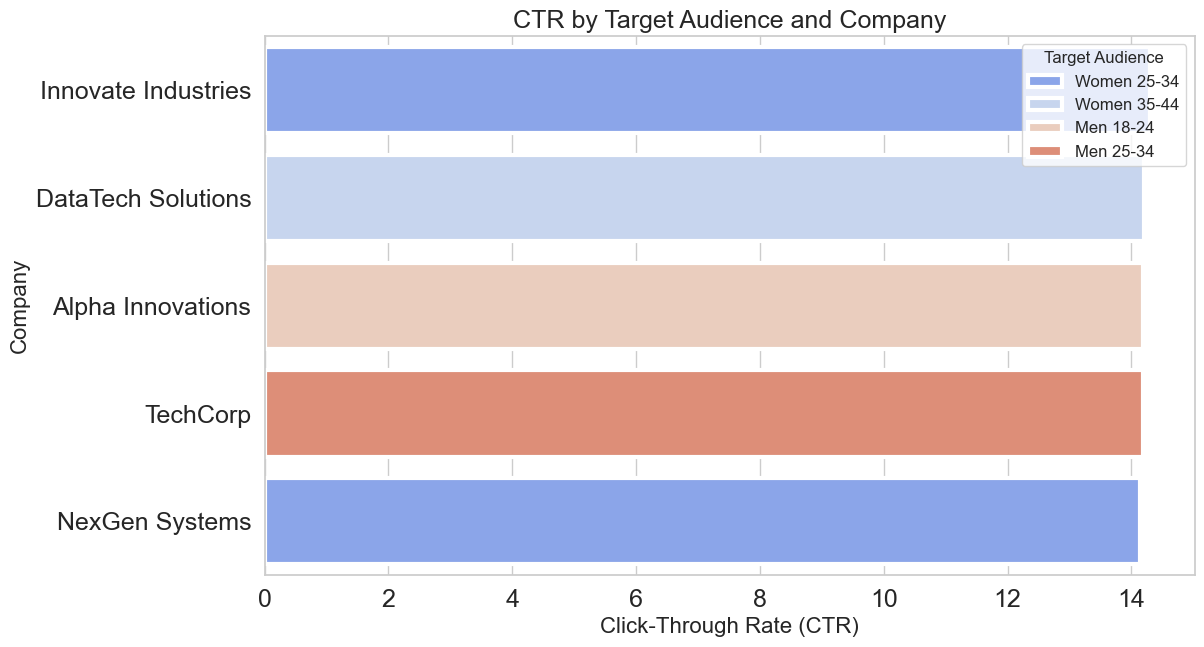

In [504]:
# Set plot style
plt.figure(figsize=(12, 7))
ax = sns.barplot(x="CTR", y="Company", hue="Target_Audience", data=preferred_Target_Audience, palette="coolwarm", dodge=False)

# Adjusting bar thickness manually
for container in ax.containers:
    for bar in container:
        bar.set_linewidth(3)  # Makes bars thicker visually

# Labels & Title
plt.xlabel("Click-Through Rate (CTR)", fontsize=16)
plt.ylabel("Company", fontsize=16)
plt.title("CTR by Target Audience and Company", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


# Adjust legend position
plt.legend(title="Target Audience", loc='upper right', fontsize=12)

# Show plot
plt.show()


##  📈📉 Market Trend

In [476]:
# Extract useful time features
market_cmp["Year"] = market_cmp["Date"].dt.year
market_cmp["Month"] = market_cmp["Date"].dt.month
market_cmp["Quarter"] = market_cmp["Date"].dt.to_period("Q")

# Group data by Month to observe trends
time_analysis = market_cmp.groupby(["Year", "Month"]).agg({
      "Clicks": "sum",
    "Impressions": "sum",
    "Acquisition_Cost": "sum",
    "Conversion_Rate": "mean",  # Mean is better for rates
    "ROI": "mean" 
}).reset_index()

# Calculate performance metrics
time_analysis["CTR"] = (time_analysis["Clicks"] / time_analysis["Impressions"]) * 100
time_analysis["CPC"] = time_analysis["Acquisition_Cost"] / time_analysis["Clicks"]
time_analysis["Revenue"] = (time_analysis["ROI"] * time_analysis["Acquisition_Cost"]) + time_analysis["Acquisition_Cost"]


# Create a 'Month-Year' column for easy visualization
time_analysis["Month-Year"] = time_analysis["Year"].astype(str) + "-" + time_analysis["Month"].astype(str)


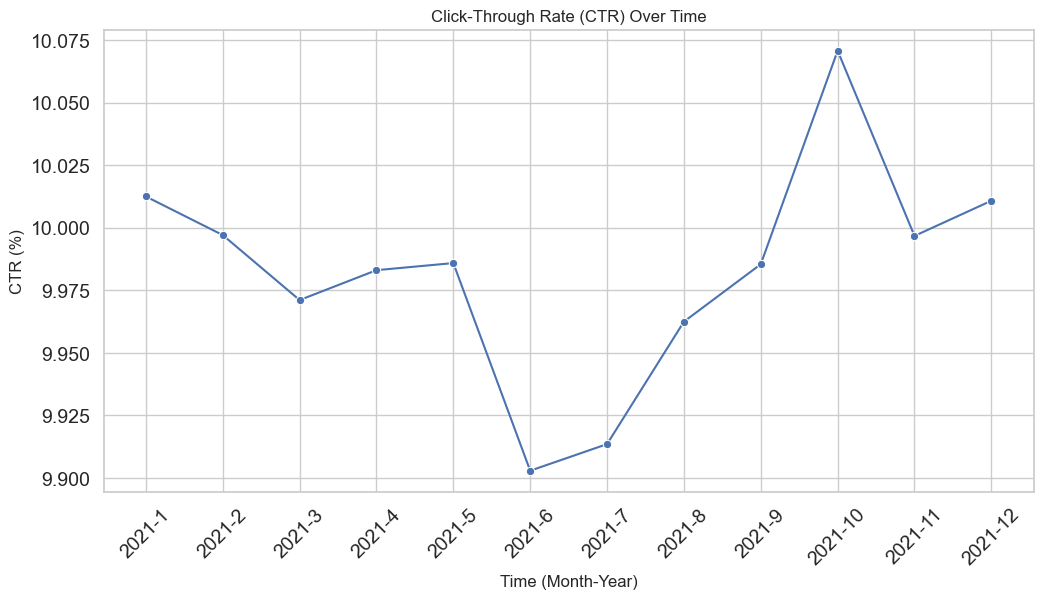

In [508]:

#  Visualization - CTR Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month-Year", y="CTR", data=time_analysis, marker="o", color="b")
plt.title("Click-Through Rate (CTR) Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


There is a noticeable CTR drop in the month of June and July,this may indicate seasonal disengagement, while CTR in the Month of October is the highest indicating massive engagement overall.

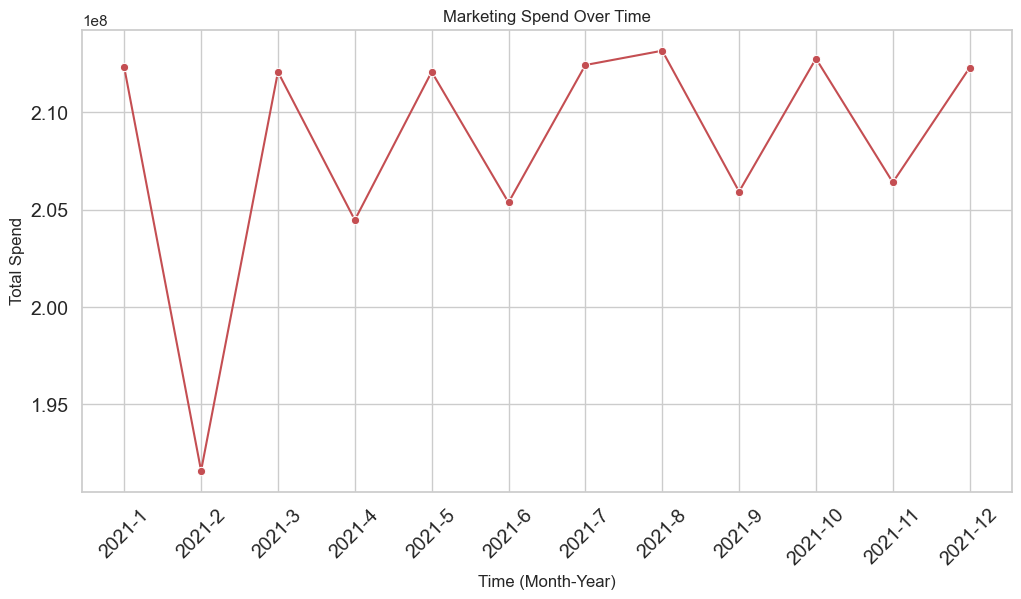

In [509]:
# Visualization - Spend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month-Year", y="Acquisition_Cost", data=time_analysis, marker="o", color="r")
plt.title("Marketing Spend Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

It is evident that the total Acquisition cost for the Month of July is significantly among the highest, yet it has the second lowest CTR, which could indicate inefficiencient Market Cost appropriation. The Same applies to June.<br>
Hence, campaigns may need optimization.

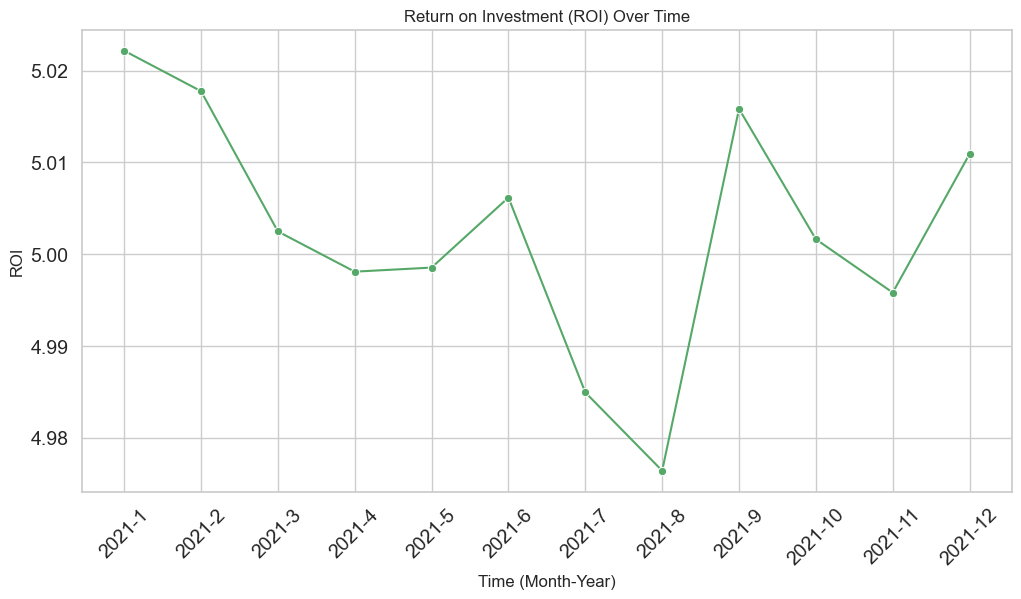

In [510]:
# Visualization - ROI Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month-Year", y="ROI", data=time_analysis, marker="o", color="g")
plt.title("Return on Investment (ROI) Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("ROI")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

The month of August has the lowest Return on Investment but has the highest amount of Acquisition Cost. Hence, it is advised to adjust marketing strategies by increase spending in high-performing periods to maximize campaign success

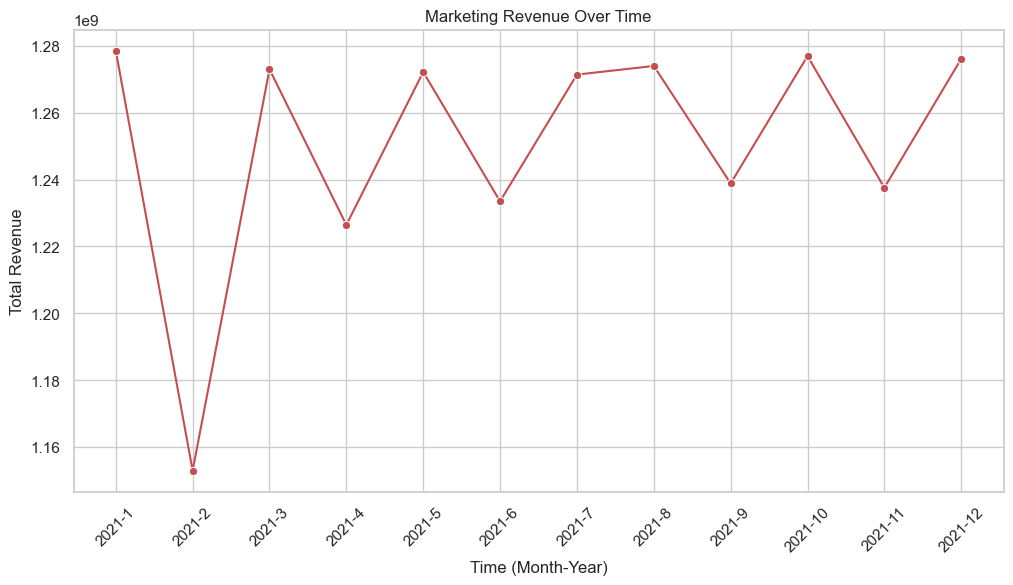

In [480]:
# Visualization - Revenue Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month-Year", y="Revenue", data=time_analysis, marker="o", color="r")
plt.title("Marketing Revenue Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


###  Overall Most Profitable Campaign type

In [481]:
market_cmp.groupby("Campaign_Type")["ROI"].mean().sort_values(ascending = False).reset_index()

,Campaign_Type,ROI
0,Influencer,5.011040
1,Search,5.008357
2,Display,5.006497
3,Email,4.994274
4,Social Media,4.991781


On Average, Influencer are the best Campaign Type 

###  Overall Campaign type & Marketing Channel with the most Click-Through Rate

In [485]:
market_cmp.groupby(["Campaign_Type", "Channel_Used" ])[["CTR", "ROI"]].mean().sort_values("ROI", ascending = False).reset_index().head(10)

,Campaign_Type,Channel_Used,CTR,ROI
0,Search,Facebook,13.971475,5.033110
1,Search,Website,14.101192,5.031826
2,Display,Email,14.210915,5.030919
3,Display,Website,14.121174,5.030686
4,Influencer,Facebook,14.162924,5.026686
5,Influencer,Website,14.124674,5.025426
6,Influencer,YouTube,13.953681,5.024224
7,Social Media,Facebook,14.142632,5.021544
8,Email,Facebook,13.918786,5.011369
9,Email,Google Ads,13.903980,5.011126


The table shows which pair of the ``Campaign_Type`` and ``Channel_Used`` are most likely to increase engagement and ROI

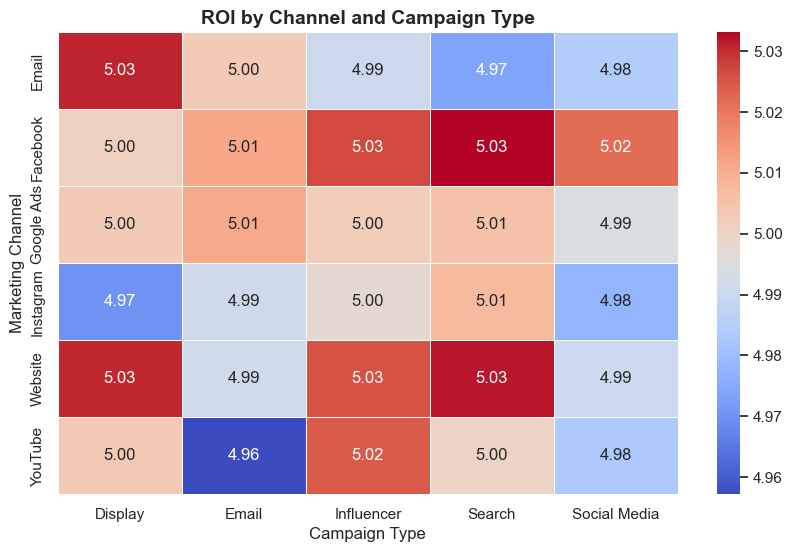

In [483]:
# Pivot the data to structure it for the heatmap
heatmap_data = market_cmp.pivot_table(index="Channel_Used", 
                                      columns="Campaign_Type", 
                                      values="ROI", 
                                      aggfunc="mean")

# Set figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Formatting
plt.title("ROI by Channel and Campaign Type", fontsize=14, fontweight="bold")
plt.xlabel("Campaign Type", fontsize=12)
plt.ylabel("Marketing Channel", fontsize=12)
plt.show()

#### High ROI Campaigns:

The Display and Website campaigns show the highest ROI across multiple marketing channels, indicating their effectiveness.
Facebook (Influencer & Search campaigns) also perform well in terms of ROI
<br>
#### Low ROI Campaigns:

YouTube Email campaigns have the lowest ROI, suggesting they might not be as effective.
Instagram and Social Media channels generally show lower ROI values compared to other platforms.
Marketing Channel Effectiveness:

Email and Website channels tend to generate high ROI across various campaign types.
Social Media and YouTube campaigns may require better targeting or improved engagement strategies to increase their ROI.

###  Target Audience with the most Click-Through Rate and Return On Investment 

In [484]:
market_cmp.groupby("Target_Audience")[["CTR", "ROI"]].mean().sort_values("ROI", ascending = False).reset_index()

,Target_Audience,CTR,ROI
0,Men 25-34,14.013255,5.020605
1,Women 35-44,14.057855,5.006371
2,All Ages,13.980318,5.005091
3,Women 25-34,14.103079,4.997351
4,Men 18-24,14.048126,4.982810


# Conclusion